# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis


# Problem Statement


In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.


# Objective


This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.


# Research Question


Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

# Importing Libraries

In [355]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as st
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [245]:
df = pd.read_csv('yellow_tripdata_2020-01.csv')

In [246]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# Exploratory Data Analysis

In [247]:
df.shape

(6405008, 18)

In [248]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [249]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [250]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

# Feature Engineering

In [251]:
df['duration'] = df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,0 days 00:02:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,0 days 00:31:00
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,0 days 01:16:00
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,0 days 00:27:50
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,0 days 00:22:39


In [252]:
df['duration'] = df['duration'].dt.total_seconds()/60

In [253]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
duration                        float64
dtype: object

# Removing Unwanted columns

In [254]:
df = df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [255]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


# Missing value Treatment

In [256]:
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [257]:
65441/len(df)*100

1.021716132126611

In [258]:
df.dropna( inplace = True)

In [259]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [260]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [261]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [262]:
df.drop_duplicates(inplace=True)

In [263]:
df.shape

(3007861, 5)

In [264]:
df['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [265]:
df['payment_type'].value_counts(normalize = True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [266]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count']>0)&(df['passenger_count']<6)]

In [267]:
df.shape

(2780283, 5)

In [268]:
df['payment_type'].replace([1,2],['card','cash'],inplace=True)

In [269]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
4,1,cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,card,10.0,2.09,14.800000
6339561,1,card,17.5,4.11,21.500000
6339563,1,card,13.0,2.13,19.000000
6339564,1,card,12.5,2.55,16.283333


# Outlier Treatment

In [270]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [271]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

In [272]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


{'whiskers': [<matplotlib.lines.Line2D at 0x192b0acb8f0>,
 'caps': [<matplotlib.lines.Line2D at 0x192b0acbec0>,
 'boxes': [<matplotlib.lines.Line2D at 0x191d1e20e60>],
 'medians': [<matplotlib.lines.Line2D at 0x192d2a4c380>],
 'fliers': [<matplotlib.lines.Line2D at 0x192d2a4c620>],
 'means': []}

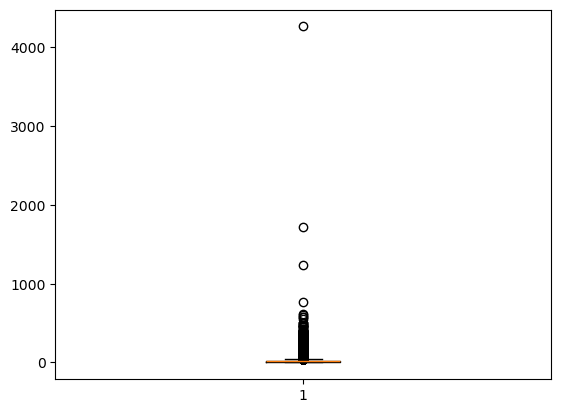

In [273]:
plt.boxplot(df['fare_amount'])

In [274]:
for col in ['fare_amount','trip_distance','duration']:
 q1= df[col].quantile(0.25)
 q3= df[col].quantile(0.75)

 IQR = q3-q1
 lower_bound = q1-1.5*IQR
 upper_bound = q3+1.5*IQR

 df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

In [275]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
5,1,cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,card,10.5,2.40,12.383333
6339555,3,card,10.0,2.09,14.800000
6339561,1,card,17.5,4.11,21.500000
6339563,1,card,13.0,2.13,19.000000


<Figure size 1200x500 with 0 Axes>

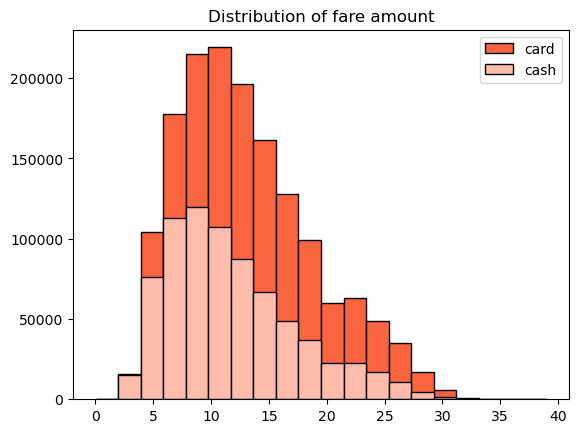

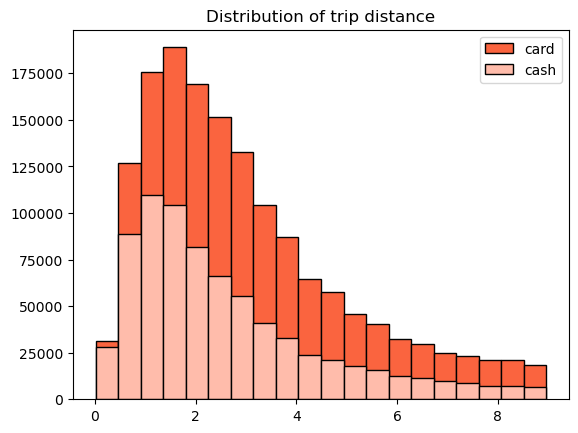

In [276]:
plt.figure(figsize=(12,5))
plt.subplots(1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='card']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='card')
plt.hist(df[df['payment_type']=='cash']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='cash')
plt.legend()
plt.show()

plt.subplots(1)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='card']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='card')
plt.hist(df[df['payment_type']=='cash']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='cash')
plt.legend()
plt.show()

In [278]:
df.shape

(2297908, 5)

In [280]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
card           13.112493  5.849281      2.992237  1.99274
cash           11.758005  5.613038      2.602207  1.91372

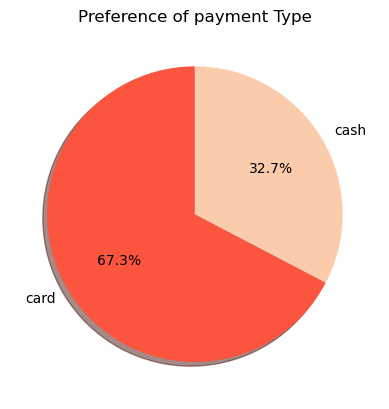

In [302]:
plt.title('Preference of payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True), labels = df['payment_type'].value_counts().index,
            startangle=90,shadow=True,autopct='%1.1f%%',colors = ['#FB543F','#FBCCAB'])
plt.show()

In [314]:
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count

passenger_count
payment_type passenger_count                 
card         1                         909245
             2                         327661
             3                         122412
             4                          63676
             5                         124045
cash         1                         460550
             2                         155472
             3                          54506
             4                          32715
             5                          47626

In [320]:
passenger_count.rename(columns = {'passenger_count':'count'}, inplace = True)
passenger_count.reset_index(inplace=True)
passenger_count

,payment_type,passenger_count,count
0,card,1,909245
1,card,2,327661
2,card,3,122412
3,card,4,63676
4,card,5,124045
5,cash,1,460550
6,cash,2,155472
7,cash,3,54506
8,cash,4,32715
9,cash,5,47626


In [334]:
passenger_count['percentage'] = (passenger_count['count']/passenger_count['count'].sum())
passenger_count

,payment_type,passenger_count,count,percentage
0,card,1,909245,0.395684
1,card,2,327661,0.142591
2,card,3,122412,0.053271
3,card,4,63676,0.027710
4,card,5,124045,0.053982
5,cash,1,460550,0.200421
6,cash,2,155472,0.067658
7,cash,3,54506,0.023720
8,cash,4,32715,0.014237
9,cash,5,47626,0.020726


In [345]:
df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df['payment_type']=['card','cash']
df.iloc[0,1:]=passenger_count.iloc[0:5,-1]
df.iloc[1,1:]=passenger_count.iloc[5:,-1]
df

,payment_type,1,2,3,4,5
0,card,0.395684,0.142591,0.053271,0.02771,0.053982
1,cash,0.200421,0.067658,0.02372,0.014237,0.020726


<Axes: ylabel='payment_type'>

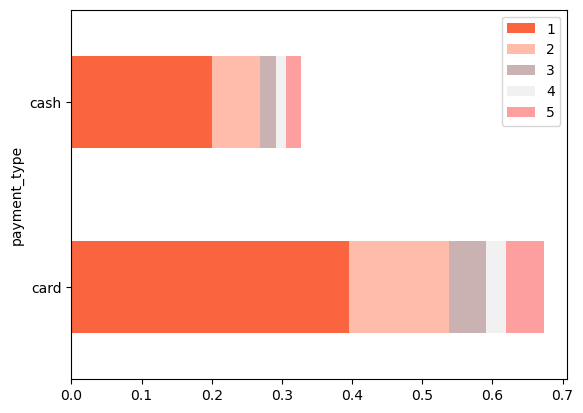

In [347]:
df.plot(x='payment_type',kind='barh',stacked = True,color=['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'])

# Hypothesis Testing

We have to check is there a significant difference in the total fare amount based on payment type

# Null hypothesis and Alternate hypothesis

Null hypothesis : There is no difference between customers who use credit card and customer who use cash

Alternate hypothesis : There is a difference in average fare between customer who use credit cards and customers who use cash

As we don't know the Population standard deviation so we will use T- Test

# Using T-Test

In [366]:
card_sample = df[df['payment_type']=='card']['fare_amount']
cash_sample = df[df['payment_type']=='cash']['fare_amount']

In [375]:
card_sample

,payment_type,1,2,3,4,5
0,card,0.395684,0.142591,0.053271,0.02771,0.053982


In [377]:
cash_sample

,payment_type,1,2,3,4,5
1,cash,0.200421,0.067658,0.02372,0.014237,0.020726


In [ ]:
t_stats,P_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)
print('T statistics',t_stats,'p-value',P_value)

t statistic 169.21111152544548 p_value 0.0

# rejecting null hypothesis

Since  P-value is much less than the common significance level of 0.05, so i can reject the null hypothesis. This means there is a statistically significant difference in the fare_amount between the two payment types.